In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

# Make plots show inside notebook
%matplotlib inline

# Paths
PROJECT_ROOT = Path.cwd().parent  # because notebooks/ is one level inside project
DATA_PATH = PROJECT_ROOT / "data" / "processed" / "train_ready.csv"

print("Using dataset:", DATA_PATH)


Using dataset: d:\FYP\autism-prescreening-tool\data\processed\train_ready.csv


In [2]:
df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
df.head()


Shape: (1054, 16)


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,age_mons,sex,jaundice,family_mem_with_asd,target,qchat_score
0,0,0,0,0,0,0,1,1,0,1,28,0,1,0,0,3
1,1,1,0,0,0,1,1,0,0,0,36,1,1,0,1,4
2,1,0,0,0,0,0,1,1,0,1,36,1,1,0,1,4
3,1,1,1,1,1,1,1,1,1,1,24,1,0,0,1,10
4,1,1,0,1,1,1,1,1,1,1,20,0,0,1,1,9


In [3]:
df.columns


Index(['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'age_mons',
       'sex', 'jaundice', 'family_mem_with_asd', 'target', 'qchat_score'],
      dtype='object')

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   a1                   1054 non-null   int64
 1   a2                   1054 non-null   int64
 2   a3                   1054 non-null   int64
 3   a4                   1054 non-null   int64
 4   a5                   1054 non-null   int64
 5   a6                   1054 non-null   int64
 6   a7                   1054 non-null   int64
 7   a8                   1054 non-null   int64
 8   a9                   1054 non-null   int64
 9   a10                  1054 non-null   int64
 10  age_mons             1054 non-null   int64
 11  sex                  1054 non-null   int64
 12  jaundice             1054 non-null   int64
 13  family_mem_with_asd  1054 non-null   int64
 14  target               1054 non-null   int64
 15  qchat_score          1054 non-null   int64
dtypes: int64(16)
memory usag

In [5]:
missing = df.isna().sum().sort_values(ascending=False)
missing = missing[missing > 0]

missing


Series([], dtype: int64)

In [6]:
target_counts = df["target"].value_counts()
target_percent = df["target"].value_counts(normalize=True) * 100

print("Target Counts:\n", target_counts)
print("\nTarget Percentages:\n", target_percent)


Target Counts:
 target
1    728
0    326
Name: count, dtype: int64

Target Percentages:
 target
1    69.070209
0    30.929791
Name: proportion, dtype: float64


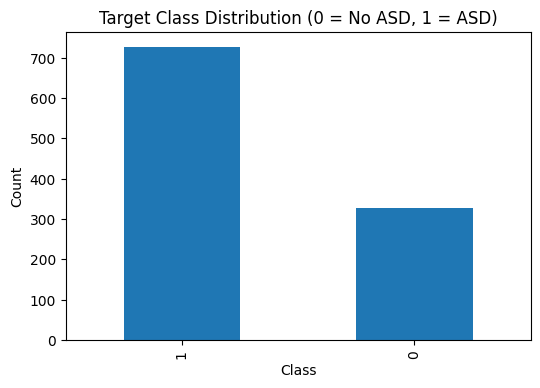

In [7]:
plt.figure(figsize=(6,4))
df["target"].value_counts().plot(kind="bar")
plt.title("Target Class Distribution (0 = No ASD, 1 = ASD)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


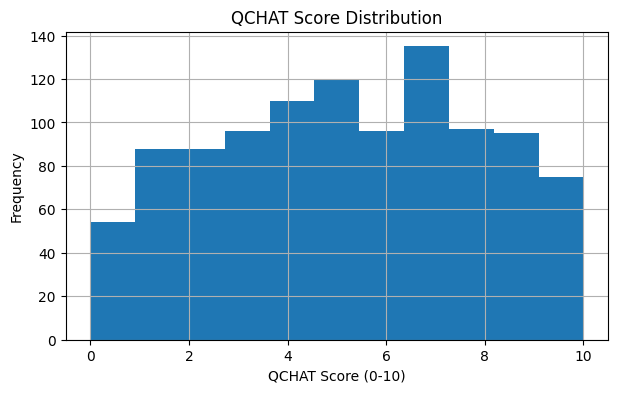

In [8]:
plt.figure(figsize=(7,4))
df["qchat_score"].hist(bins=11)
plt.title("QCHAT Score Distribution")
plt.xlabel("QCHAT Score (0-10)")
plt.ylabel("Frequency")
plt.show()


In [9]:
grouped = df.groupby("target")["qchat_score"].describe()
grouped


,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,326.0,1.693252,1.066014,0.0,1.0,2.0,3.0,3.0
1,728.0,6.788462,1.921937,4.0,5.0,7.0,8.0,10.0


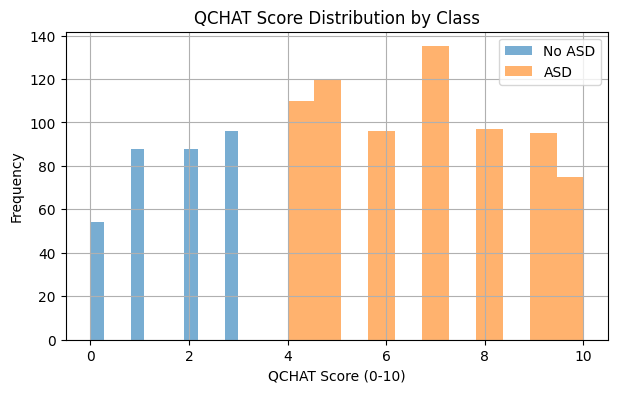

In [10]:
plt.figure(figsize=(7,4))

df[df["target"] == 0]["qchat_score"].hist(alpha=0.6, bins=11, label="No ASD")
df[df["target"] == 1]["qchat_score"].hist(alpha=0.6, bins=11, label="ASD")

plt.title("QCHAT Score Distribution by Class")
plt.xlabel("QCHAT Score (0-10)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


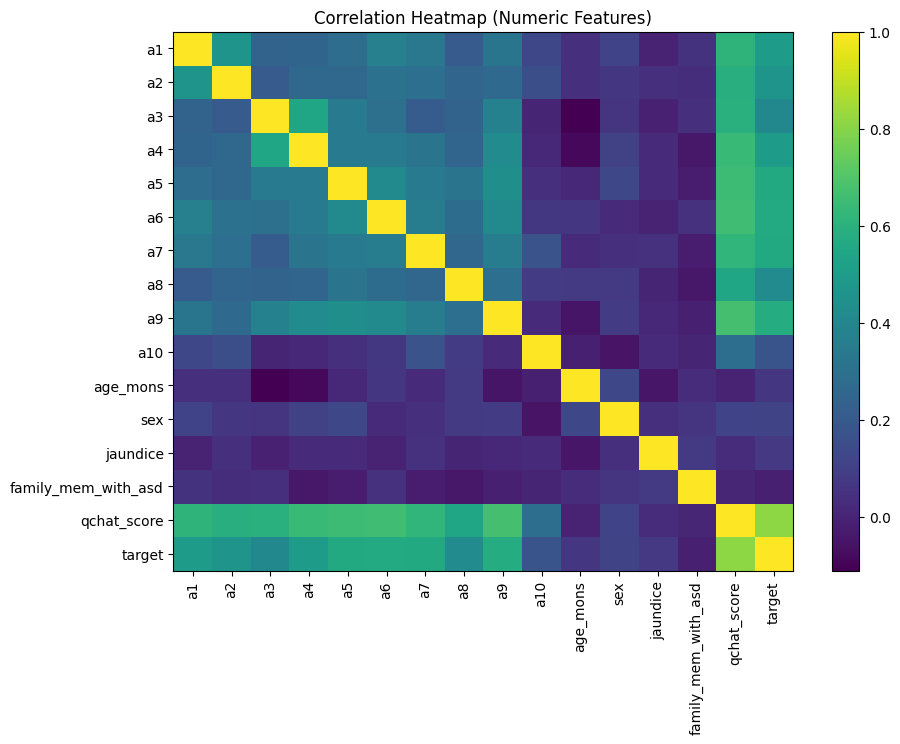

In [13]:
q_cols = [f"a{i}" for i in range(1, 11)]

corr_df = df[q_cols + ["age_mons", "sex", "jaundice", "family_mem_with_asd", "qchat_score", "target"]]
corr = corr_df.corr()

plt.figure(figsize=(10,7))
plt.imshow(corr, aspect="auto")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [14]:
asd_means = df[df["target"] == 1][q_cols].mean()
non_asd_means = df[df["target"] == 0][q_cols].mean()

diff = (asd_means - non_asd_means).sort_values(ascending=False)

diff


a9     0.624410
a6     0.608668
a5     0.608618
a7     0.581204
a4     0.546349
a1     0.540585
a2     0.498727
a8     0.460544
a3     0.434487
a10    0.191617
dtype: float64

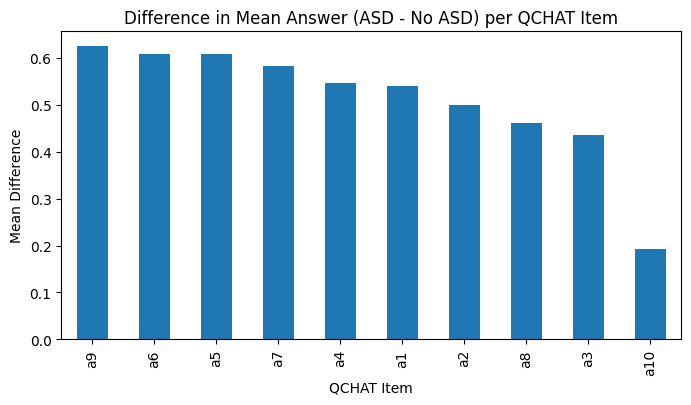

In [15]:
plt.figure(figsize=(8,4))
diff.plot(kind="bar")
plt.title("Difference in Mean Answer (ASD - No ASD) per QCHAT Item")
plt.xlabel("QCHAT Item")
plt.ylabel("Mean Difference")
plt.show()
